# Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
from datetime import datetime,time

import warnings
warnings.filterwarnings("ignore")

In [2]:
airlines = pd.read_excel("C:\\Excelr Data\\Assignments\\Forecasting\\Airlines+Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 


In [4]:
month=month*8
month1=pd.DataFrame(month)
month1.shape

(96, 1)

In [5]:
airlines['months']=month1

In [6]:
airlines.head()

,Month,Passengers,months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [7]:
month_dummies = pd.DataFrame(pd.get_dummies(airlines['months']))
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
airlines = pd.concat([airlines,month_dummies],axis = 1)

In [9]:
airlines.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [10]:
airlines["t"] = np.arange(1,97)

In [11]:
airlines["t_squared"] = airlines["t"]*airlines["t"]
airlines.columns

Index(['Month', 'Passengers', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared'],
      dtype='object')

In [12]:
airlines["log_passengers"] = np.log(airlines["Passengers"])

In [13]:
airlines.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


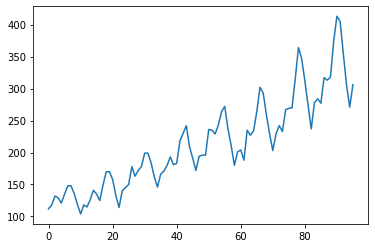

In [14]:
airlines.Passengers.plot()

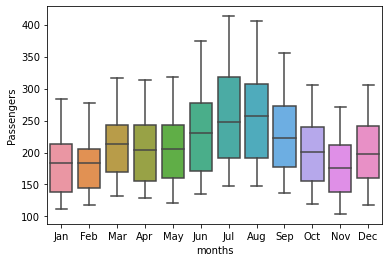

In [15]:
# Boxplot for ever
sns.boxplot(x="months",y="Passengers",data=airlines)


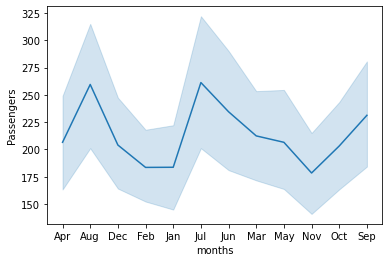

In [16]:
# Line plot for Ridership based on year
sns.lineplot(x="months",y="Passengers",data=airlines)


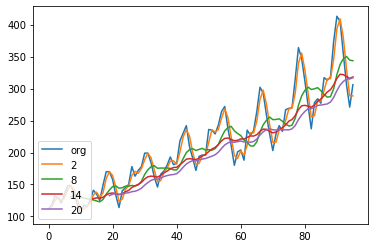

In [17]:
# Centering moving average for the time series to understand better about the trend character in Airline
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


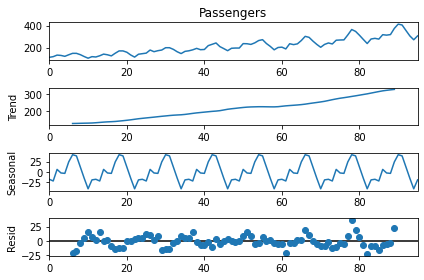

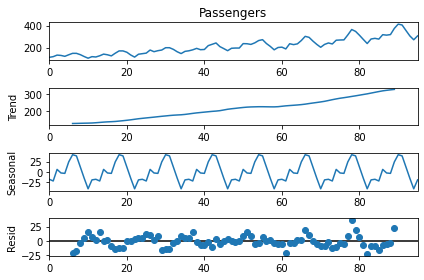

In [18]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(airlines.Passengers,model="additive",freq=12)
decompose_ts_add.plot()


C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


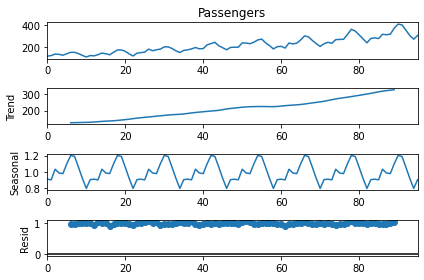

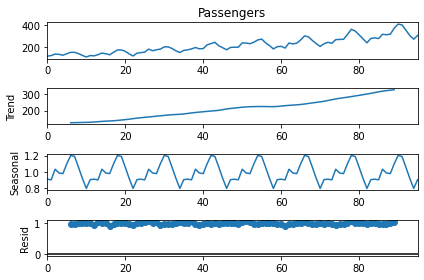

In [19]:
# Time series decomposition plot 
decompose_ts_mul = seasonal_decompose(airlines.Passengers,model="multiplicative",freq=12)
decompose_ts_mul.plot()

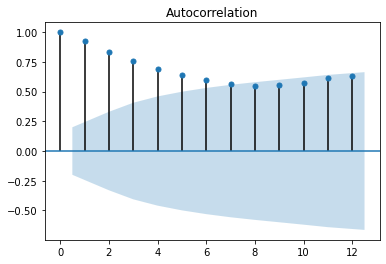

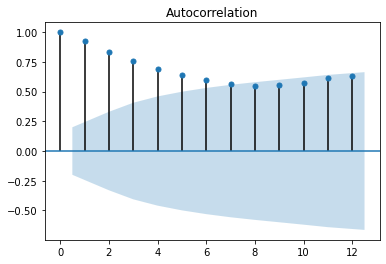

In [20]:
# ACF plots on Original data sets 
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)


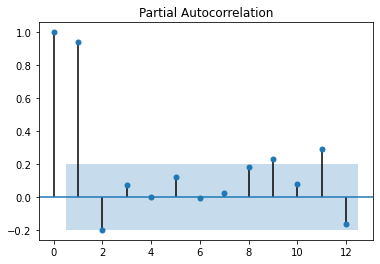

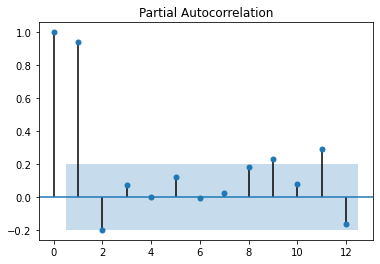

In [21]:
# PACF plots on Original data sets
tsa_plots.plot_pacf(airlines.Passengers,lags=12)


In [22]:
Train = airlines.head(75)
Test = airlines.tail(25)

In [23]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


51.838097495845105

In [24]:
##################### Exponential ##############################

Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.775259750198174

In [25]:
#################### Quadratic ###############################

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad


54.03140645625432

In [26]:
################### Additive seasonality ########################

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

123.02763788084253

In [27]:
################## Additive Seasonality Quadratic ############################

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

36.53627444548513

In [28]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea


128.166228175962

In [29]:
##################Multiplicative Additive Seasonality ###########

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.565825437617226

In [30]:
################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}


In [31]:
table_rmse=pd.DataFrame(data)
table_rmse
# so rmse_add_sea_quad has the least value among the models prepared so far 
# Predicting new values 


,MODEL,RMSE_Values
0,rmse_linear,51.838097
1,rmse_Exp,42.775260
2,rmse_Quad,54.031406
3,rmse_add_sea,123.027638
4,rmse_add_sea_quad,36.536274
5,rmse_Mult_sea,128.166228
6,rmse_Mult_add_sea,11.565825


In [32]:

model_full = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()


In [33]:
pred_new  = pd.Series(Mul_Add_sea.predict(Test))
pred_new

71    5.470682
72    5.494264
73    5.509857
74    5.654221
75    5.622453
76    5.610496
77    5.722893
78    5.823936
79    5.832346
80    5.725043
81    5.597962
82    5.468450
83    5.603675
84    5.627257
85    5.642850
86    5.787214
87    5.755446
88    5.743489
89    5.855886
90    5.956929
91    5.965339
92    5.858035
93    5.730954
94    5.601443
95    5.736667
dtype: float64

In [34]:
pred_new1=np.exp(pred_new)


In [35]:
Test["forecasted_Passengers"] = pd.Series(pred_new1)
Test

C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers,forecasted_Passengers
71,2000-12-01,229,Dec,0,0,1,0,0,0,0,0,0,0,0,0,72,5184,5.433722,237.622162
72,2001-01-01,242,Jan,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938,243.292411
73,2001-02-01,233,Feb,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038,247.115875
74,2001-03-01,267,Mar,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249,285.494089
75,2001-04-01,269,Apr,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711,276.566956
76,2001-05-01,270,May,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422,273.279741
77,2001-06-01,315,Jun,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573,305.788289
78,2001-07-01,364,Jul,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154,338.301142
79,2001-08-01,347,Aug,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325,341.158079
80,2001-09-01,312,Sep,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003,306.446333


In [36]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


In [37]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


13.584155829851989

In [38]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 


10.200997069266744

In [39]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


11.993280618572696

In [40]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = airlines.index[0],end = airlines.index[-1])


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [41]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers) 


9.488167518029377

In [42]:
# Lets us use auto_arima from p
from pmdarima.arima import auto_arima

In [43]:
auto_arima_model = auto_arima(Train["Passengers"],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)
       

Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=470.531, BIC=474.785, Time=0.090 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=462.033, BIC=468.414, Time=0.278 seconds
Fit ARIMA(0,1,0)x(0,1,2,12) [intercept=True]; AIC=463.522, BIC=472.030, Time=0.899 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=462.935, BIC=469.316, Time=0.204 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=463.750, BIC=472.259, Time=0.389 seconds
Fit ARIMA(0,1,0)x(1,1,2,12) [intercept=True]; AIC=464.122, BIC=474.758, Time=2.839 seconds
Fit ARIMA(0,1,0)x(2,1,0,12) [intercept=True]; AIC=463.218, BIC=471.727, Time=0.787 seconds
Fit ARIMA(0,1,0)x(2,1,1,12) [intercept=True]; AIC=465.124, BIC=475.760, Time=1.176 seconds
Fit ARIMA(0,1,0)x(2,1,2,12) [intercept=True]; AIC=465.741, BIC=478.504, Time=3.105 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=468.511, BIC=474.892, Time=0.141 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=460.556, BIC=469.065, Time=0.294 seconds

Fit ARIMA(4,1,0)x(0,1,0,12) [intercept=True]; AIC=468.120, BIC=480.883, Time=0.270 seconds
Fit ARIMA(4,1,0)x(0,1,1,12) [intercept=True]; AIC=463.146, BIC=478.036, Time=0.512 seconds
Fit ARIMA(4,1,0)x(1,1,0,12) [intercept=True]; AIC=462.697, BIC=477.587, Time=0.749 seconds
Fit ARIMA(4,1,1)x(0,1,0,12) [intercept=True]; AIC=470.122, BIC=485.012, Time=0.358 seconds
Fit ARIMA(5,1,0)x(0,1,0,12) [intercept=True]; AIC=470.111, BIC=485.001, Time=0.302 seconds
Total fit time: 104.815 seconds


In [44]:
auto_arima_model.summary() # SARIMAX(1, 1, 1)x(0, 1, 1, 12)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   75
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -225.812
Date:                            Fri, 17 Jul 2020   AIC                            459.625
Time:                                    19:22:10   BIC                            468.133
Sample:                                         0   HQIC                           462.966
                                             - 75                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4087      1.261      0.324      0.746      -2.063       2.880
ar.L1         -0.2899      0.117     -2.475      0.013      -0.520      -0.060
ar.S.L12      -0.4355      0.121     -3.606      0.000      -0.672      -0.199
sigma2        81.7998     15.411      5.308      0.000      51.595     112.004
===================================================================================
Ljung-Box (Q):                       25.44   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.96   Prob(JB):                         0.55
Heteroskedasticity (H):               2.28   Skew:                             0.34
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
# For getting Fitted values for train data set we use 
# predict_in_sample() function 
auto_arima_model.predict_in_sample( )


array([2.20693957e-01, 1.12218908e+02, 1.18221027e+02, 1.32220157e+02,
       1.29220952e+02, 1.21220882e+02, 1.35220198e+02, 1.48220434e+02,
       1.48220759e+02, 1.36221125e+02, 1.19220915e+02, 1.04221822e+02,
       1.74331009e+02, 1.21224509e+02, 1.38834380e+02, 1.37994733e+02,
       1.28155021e+02, 1.39864014e+02, 1.59385084e+02, 1.67963919e+02,
       1.58289009e+02, 1.41271611e+02, 1.20651651e+02, 1.29280708e+02,
       1.34413533e+02, 1.52427139e+02, 1.66081404e+02, 1.69819701e+02,
       1.57268100e+02, 1.86796914e+02, 1.99880599e+02, 1.98398420e+02,
       1.87408673e+02, 1.63762792e+02, 1.45291229e+02, 1.66817539e+02,
       1.68148687e+02, 1.78011631e+02, 2.02344621e+02, 1.85036016e+02,
       1.82400201e+02, 1.96878577e+02, 2.33273314e+02, 2.33018185e+02,
       2.25235929e+02, 1.91699936e+02, 1.72563439e+02, 1.95512877e+02,
       1.99586471e+02, 2.04536369e+02, 2.18046087e+02, 2.17167755e+02,
       2.36889171e+02, 2.54981689e+02, 2.61755185e+02, 2.69709272e+02,
      

In [46]:
# For getting predictions for future we use predict() function 
pred_test = pd.Series(auto_arima_model.predict(n_periods=25))


In [47]:
# Adding the index values of Test Data set to predictions of Auto Arima
pred_test.index = Test.index
MAPE(pred_test,Test.Passengers) 

16.223879225036615

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [49]:
model = SARIMAX(Train['Passengers'],order=(1,1,0),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                   75
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -278.677
Date:                              Fri, 17 Jul 2020   AIC                            565.354
Time:                                      19:22:32   BIC                            574.570
Sample:                                           0   HQIC                           569.030
                                               - 75                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1625      0.105     -1.546      0.122      -0.369       0.044
ar.S.L12       0.9617      0.043     22.306      0.000       0.877       1.046
ma.S.L12      -0.4136      0.183     -2.255      0.024      -0.773      -0.054
sigma2        82.0885     15.681      5.235      0.000      51.354     112.823
===================================================================================
Ljung-Box (Q):                       31.74   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.82   Prob(JB):                         0.35
Heteroskedasticity (H):               3.26   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# Obtain predicted values
start=len(Train)
end=len(Train)+len(Test)-1
srma_pred = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(1,0,1,12) Predictions')
srma_pred


75    261.117358
76    263.797210
77    287.492716
78    315.510147
79    313.519014
80    282.941762
81    257.465267
82    233.309481
83    255.746395
84    263.995515
85    255.966295
86    290.127847
87    284.232670
88    286.848564
89    309.630756
90    336.576730
91    334.661650
92    305.254889
93    280.753603
94    257.522474
95    279.100527
96    287.033880
97    279.312010
98    312.165894
99    306.496378
Name: SARIMA(1,1,0)(1,0,1,12) Predictions, dtype: float64

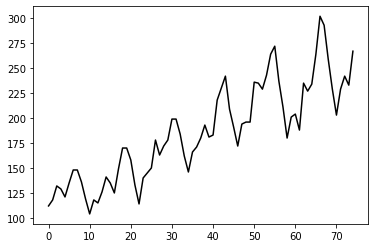

In [51]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")


In [ ]:
plt.plot(Test.index, Test["Ridership"], label='Test',color="blue")


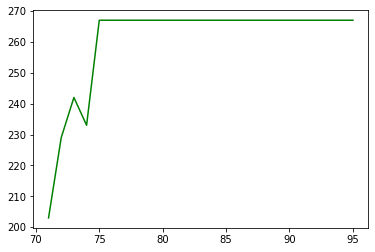

In [52]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")


In [ ]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")


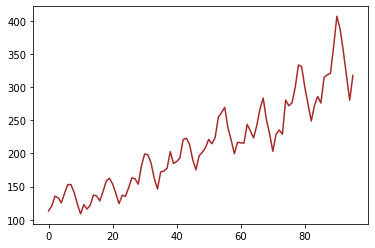

In [56]:
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")


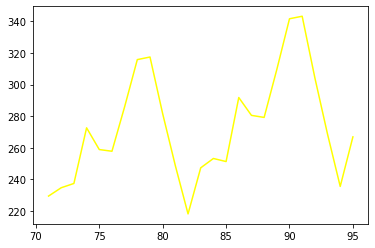

In [58]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")


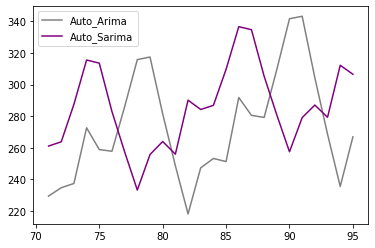

In [59]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="Auto_Arima",color="grey")
plt.plot(pred_hwe_mul_add.index,srma_pred,label="Auto_Sarima",color="purple")
plt.legend(loc='best')
